In [65]:
import numpy as np 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

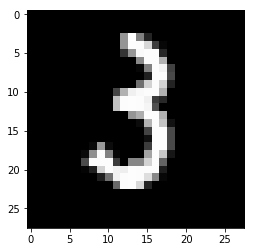

It looks like -  Dress


In [68]:
i = 1234
plt.imshow(x_train[i], cmap="gray")
plt.show()
print("It looks like - ", label_dict.get(y_train[i]))

In [69]:
# Min Max Scalar Technique for normalization
x_train.max(), x_train.min()

(255, 0)

In [70]:
x_train = x_train / 255.0
x_test = x_test / 255.0

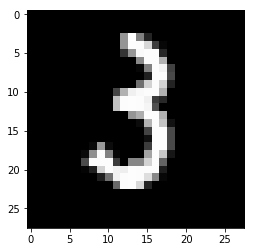

In [71]:
plt.imshow(x_train[1234], cmap="gray")
plt.show()

In [72]:
np.array(x_train[1234]).shape

(28, 28)

In [73]:
x_train[0].shape

(28, 28)

In [74]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [75]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [76]:
from keras import backend as K

In [77]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [78]:
y_test = tfk.utils.to_categorical(y_test)

In [79]:
y_train = tfk.utils.to_categorical(y_train) 

In [80]:
y_train.shape[0]

60000

In [81]:
tb = tfk.callbacks.TensorBoard()

In [82]:
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(keras.layers.MaxPool2D(2,2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))



In [83]:
model.compile(optimizer='rmsprop', loss=tfk.losses.categorical_crossentropy, metrics=["acc"])

In [84]:
model_history = model.fit(x_train, y_train, batch_size=600, epochs=30, validation_split=0.2, callbacks=[tb])

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 60s 1ms/step - loss: 0.5458 - acc: 0.8347 - val_loss: 0.1604 - val_acc: 0.9562
Epoch 2/30
48000/48000 [==============================] - 55s 1ms/step - loss: 0.1590 - acc: 0.9519 - val_loss: 0.0822 - val_acc: 0.9765
Epoch 3/30
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1087 - acc: 0.9674 - val_loss: 0.0726 - val_acc: 0.9788
Epoch 4/30
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0847 - acc: 0.9751 - val_loss: 0.0609 - val_acc: 0.9814
Epoch 5/30
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0715 - acc: 0.9781 - val_loss: 0.0513 - val_acc: 0.9856
Epoch 6/30
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0621 - acc: 0.9812 - val_loss: 0.0446 - val_acc: 0.9868
Epoch 7/30
48000/48000 [==============================] - 55s 1ms/step - loss: 0

we can observe the accuracy for the image classification obtained nearly 99.5%

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               204928    
__________

In [86]:
model.evaluate(x_test, y_test, batch_size=600)

10000/10000 [==============================] - 5s 481us/step


[0.024837364880368112, 0.9914000082015991]

In [93]:
y_test_model = model.predict(x_test, batch_size=600)

In [94]:
y_test_model[0]

array([9.8599546e-13, 8.0356728e-11, 1.4410166e-07, 5.3385744e-08,
       1.8080341e-13, 8.6762552e-13, 3.0145125e-17, 9.9999976e-01,
       9.8002986e-12, 1.7637031e-10], dtype=float32)

In [95]:
np.argmax(y_test_model[0])

7

In [96]:
y_test_model = np.argmax(y_test_model, axis=1)

In [97]:
y_test_original = np.argmax(y_test, axis=1)

In [98]:
y_test_model, y_test_original

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
cm = confusion_matrix(y_test_original, y_test_model)

In [101]:
import seaborn as sns

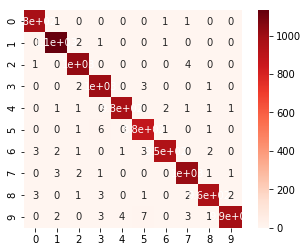

In [104]:
sns.heatmap(cm,annot=True,square=True,cmap="Reds")

In [105]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test_original, y_test_model))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [107]:
model_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [108]:
model_history.params

{'batch_size': 600,
 'epochs': 30,
 'steps': None,
 'samples': 48000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

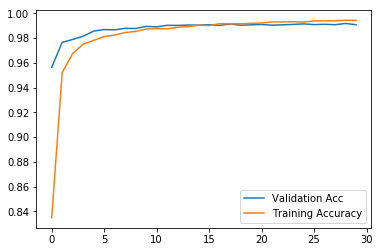

In [109]:
plt.plot(model_history.history["val_acc"], label="Validation Acc")
plt.plot(model_history.history["acc"], label="Training Accuracy")
plt.legend()

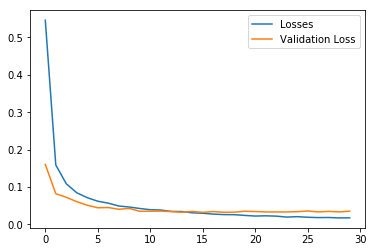

In [110]:
plt.plot(model_history.history.get("loss") ,label="Losses")
plt.plot(model_history.history.get("val_loss"), label="Validation Loss")
plt.legend()